# Machine Learning in Python - Project 1

Due Friday, March 6th by 5 pm.

*include contributors names here*

In [1]:
# Add any additional libraries or submodules below

# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
# Load data
d = pd.read_csv("the_office.csv")

In [3]:
writer_data = d[['writer', 'imdb_rating']]  # Extract writer and imdb rating data
writers = writer_data['writer'].unique()
writers = [i.split(';') for i in writers]
flat_list = set(sum(writers, []))    # Get the unique list of different writers

new_writer_data = pd.DataFrame(np.zeros((186, 40)), columns= flat_list)   # Generate new dataframe 
row_index = 0
for writer in writer_data['writer']:   # Where the features are unique writers.
    w = writer.split(';')
    for name in w:
        new_writer_data.loc[row_index, name] = 1
    row_index += 1
    
X_writer = new_writer_data
y = d['imdb_rating']   # y is the imdb rating.
new_writer_data = new_writer_data.join(y)

In [4]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = new_writer_data.corr()
#Correlation with output variable
cor_target = abs(cor["imdb_rating"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Greg Daniels      0.233452
Owen Ellickson    0.222360
imdb_rating       1.000000
Name: imdb_rating, dtype: float64

<Figure size 864x720 with 0 Axes>

In [5]:
print(new_writer_data[["Owen Ellickson","Greg Daniels"]].corr())
print(new_writer_data[["Owen Ellickson","Greg Daniels"]].corr()) # It is seen that the two writers are 
                                # not highly correlated with each other. Hence we would keep both variables.

                Owen Ellickson  Greg Daniels
Owen Ellickson        1.000000     -0.038932
Greg Daniels         -0.038932      1.000000
                Owen Ellickson  Greg Daniels
Owen Ellickson        1.000000     -0.038932
Greg Daniels         -0.038932      1.000000


In [6]:
reg = LassoCV()
reg.fit(X_writer, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_writer,y))
coef = pd.Series(reg.coef_, index = X_writer.columns)
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.000053
Best score using built-in LassoCV: 0.423544
Lasso picked 38 variables and eliminated the other 2 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

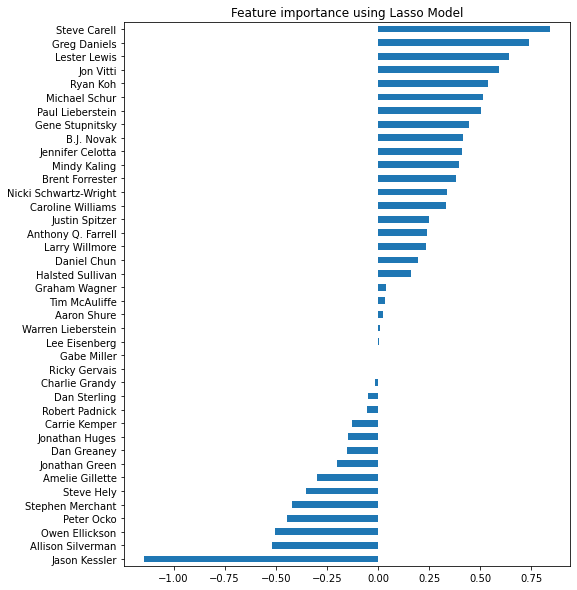

In [7]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [8]:
# We can use the same method above for the feature main character
char_data = d[['main_chars', 'imdb_rating']]  # Extract main character and imdb rating data
characters = char_data['main_chars'].unique()
characters = [i.split(';') for i in characters]
flat_chars = set(sum(characters, []))    # Get the unique list of different characters

new_characters_data = pd.DataFrame(np.zeros((186, 17)), columns= flat_chars)   # Generate new dataframe 
row_index = 0
for char in char_data['main_chars']:   # Where the features are unique characters.
    w = char.split(';')
    for name in w:
        new_characters_data.loc[row_index, name] = 1
    row_index += 1
    
X_character = new_characters_data
new_characters_data = new_characters_data.join(y)

In [9]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = new_characters_data.corr()
#Correlation with output variable
cor_target = abs(cor["imdb_rating"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

Erin           0.370276
Michael        0.497974
imdb_rating    1.000000
Name: imdb_rating, dtype: float64

<Figure size 864x720 with 0 Axes>

In [10]:
print(new_characters_data[["Michael","Erin"]].corr())
print(new_characters_data[["Michael","Erin"]].corr())
# It seems that these two characters have pretty high correlation thus we only need to keep one of them.

          Michael      Erin
Michael  1.000000 -0.566717
Erin    -0.566717  1.000000
          Michael      Erin
Michael  1.000000 -0.566717
Erin    -0.566717  1.000000


Best alpha using built-in LassoCV: 0.006700
Best score using built-in LassoCV: 0.311062
Lasso picked 11 variables and eliminated the other 6 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

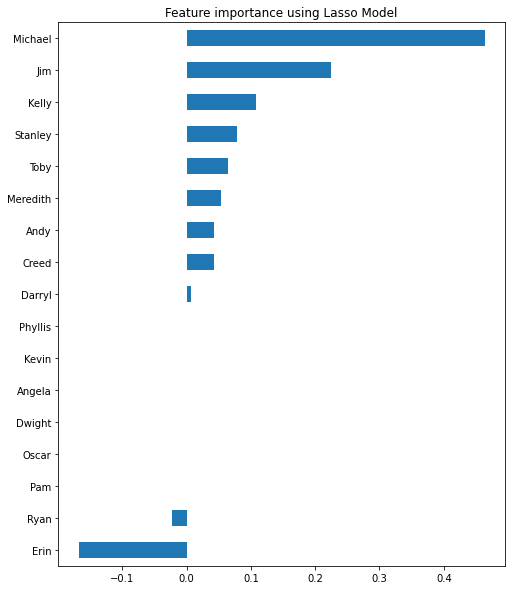

In [11]:
reg = LassoCV()
reg.fit(X_character, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_character,y))
coef = pd.Series(reg.coef_, index = X_character.columns)
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [13]:
# As for directors
directors_data = d[['director', 'imdb_rating']]  # Extract directors and imdb rating data
directors = directors_data['director'].unique()
directors = [i.split(';') for i in directors]
flat_directors = set(sum(directors, []))    # Get the unique list of different directors

new_directors_data = pd.DataFrame(np.zeros((186, 60)), columns= flat_directors)   # Generate new dataframe 
row_index = 0
for director in directors_data['director']:   # Where the features are unique directors.
    w = director.split(';')
    for name in w:
        new_directors_data.loc[row_index, name] = 1
    row_index += 1
    
X_directors = new_directors_data
new_directors_data = new_directors_data.join(y)

In [14]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = new_directors_data.corr()
#Correlation with output variable
cor_target = abs(cor["imdb_rating"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Paul Feig      0.232619
imdb_rating    1.000000
Name: imdb_rating, dtype: float64

<Figure size 864x720 with 0 Axes>

Best alpha using built-in LassoCV: 0.010003
Best score using built-in LassoCV: 0.111508
Lasso picked 6 variables and eliminated the other 54 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

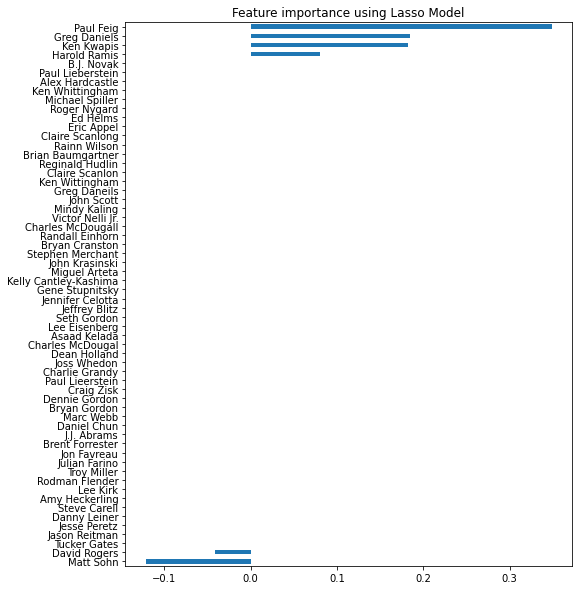

In [15]:
reg = LassoCV()
reg.fit(X_directors, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_directors,y))
coef = pd.Series(reg.coef_, index = X_directors.columns)
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [16]:
# In conclusion, We pick Greg Daniels and Owen Ellickson for writers, micheal and Erin for main characters 
# and paul Feig for directors which to be the important features in predict the imdb rating.